# INFO-F-422 -  Statistical Foundations of Machine Learning 

### Student 1 - __[antoine.bedaton@ulb.be](mailto:antoine.bedaton@ulb.be) - Student ID 459482__
### Student 2 - __[pierre.defraene@ulb.be](mailto:pierre.defraene@ulb.be) - Student ID 463941__
### Student 3 - __[nathan.marotte@ulb.be](mailto:nathan.marotte@ulb.be) - Student ID 459274__

### Video presentation: www.youtube.com/abcd1234

## Project Title


# Introduction

Using data from Taarifa and the Tanzanian Ministry of Water, we are asked to predict which pump are functional, non functional, or functional but need some repairs. The data contains information about each pump (position, region name, population, type of payment, installator, etc ...) and comes in 3 files : 

- training_set_labels : Contains the list of all id followed by their status (functionning, non functionning or needing repairs)

- training_set_values : Contains all the information about each pump with their id that correspond to training_set_labels

- test_set_values : The same structure as training_set_values but for which the status is unknown and that we will have to predict.

First, we will preprocess the data to remove redundent or useless information. For exemple the name of the pump isn't really relevant for guessing if it is working or not, while the name of the constructor is.

Once we reduced the size of the input space, we will run our 3 models on the data, that is training_set_values with their status_group column added.

Our group chose the 3 following models : 

- Decision Tree (rpart library)
- Neural Network (nnet library)
- Random Forest (randomForest library)

Uncomment and execute the following cell to install all the require libraries

In [1]:
install_project_packages <- function() {
    install.packages('dummies')
    install.packages('rpart')
    install.packages('rpart.plot')
    install.packages('nnet')
    install.packages('randomForest')
    install.packages('gbm')
    install.packages('e1071')
    install.packages('caret')
}

#install_project_packages()

We will be using R in version 3.6.1
This can be checked by executing the following cell

In [2]:
R.version$version.string

[1] "R version 3.6.1 (2019-07-05)"

Since there is a lot of columns in the data, we will increase the limit of the default max number of columns represented in a print with this cell

In [3]:
options(repr.matrix.max.cols=100)

We will use the data provided by the competition "Pump it Up: Data Mining the Water Table" available [here](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/])

In [4]:
load_data <- function() {
    training_set_labels <<- read.csv(file = 'data/training_set_labels.csv', na.strings = c("", " ", "none", "unknown"))
    test_set_values <<- read.csv(file = 'data/test_set_values.csv', na.strings = c("", " ", "none", "unknown"))
    training_set_values <<- read.csv(file = 'data/training_set_values.csv',  na.strings = c("", " ", "none", "unknown"))
}
load_data()

# Data preprocessing

## The raw Data
Here is the data as received, as we can see it contains a lot of column and rows, some of which might not be useful

In [5]:
head(training_set_labels)
head(test_set_values)
head(training_set_values)

id,status_group
69572,functional
8776,functional
34310,functional
67743,non functional
19728,functional
9944,functional


id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
50785,0,2013-02-04,Dmdd,1996,DMDD,35.29080,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NA,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
51630,0,2013-02-04,Government Of Tanzania,1569,DWE,36.65671,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
17168,0,2013-02-01,NA,1567,NA,34.76786,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NA,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
45559,0,2013-01-22,Finn Water,267,FINN WATER,38.05805,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NA,GeoData Consultants Ltd,VWC,NA,True,1987,other,other,other,vwc,user-group,NA,NA,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
49871,500,2013-03-27,Bruder,1260,BRUDER,35.00612,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NA,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
52449,0,2013-03-04,Government Of Tanzania,1685,DWE,36.68528,-3.302420,Masaga,0,Pangani,Masaga,Arusha,2,2,Arusha Rural,Ilkiding'a,200,True,GeoData Consultants Ltd,VWC,Timbolo sambasha TPRI pipe line,True,1990,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
69572,6000,2011-03-14,Roman,1390,Roman,34.93809,-9.856322,NA,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0,2013-03-06,Grumeti,1399,GRUMETI,34.69877,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NA,GeoData Consultants Ltd,Other,NA,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25,2013-02-25,Lottery Club,686,World vision,37.46066,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0,2013-01-28,Unicef,263,UNICEF,38.48616,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NA,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0,2011-07-13,Action In A,0,Artisan,31.13085,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NA,NA,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
9944,20,2011-03-13,Mkinga Distric Coun,0,DWE,39.17280,-4.765587,Tajiri,0,Pangani,Moa/Mwereme,Tanga,4,8,Mkinga,Moa,1,True,GeoData Consultants Ltd,VWC,Zingibali,True,2009,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,salty,salty,enough,enough,other,other,NA,communal standpipe multiple,communal standpipe


## The Preprocessing

Before starting the modeling, we must first process the data. We are given a huge number of columns and rows, some of which are not useful to determine the functioning of the pump. For instance, maybe the name of the pump is not important to guess if it is working or not.

### Removing useless columns
First we will check all the columns and check if, by chance, one column has always the same value. If there exist such a column, we can safely delete it since it doesn't bring any information to the model. One column was found that is always the same value, we will then remove it from the dataset

In [6]:
remove_always_same_columns <- function(show = FALSE) {
    for (colname in names(training_set_values)) {
        list_of_unique <- unique(training_set_values[colname])
        if (nrow(list_of_unique) == 1 && show){
            print(paste("the column", colname, "has always the same value"))
        }
    }
    # Results: one column `recorded_by` that we can remove
    training_set_values$recorded_by <<- NULL
    test_set_values$recorded_by <<- NULL
}

# Result : we remove maximum one column
before_remove_length <- length(names(training_set_values))
remove_always_same_columns(show = TRUE)
print(paste("We removed", before_remove_length - length(names(training_set_values)), "columns"))

[1] "the column recorded_by has always the same value"
[1] "We removed 1 columns"


Now we can look at the data in a less strict manner. What if for only a few of the entries, we have a different value ? This won't be detected with the above loop, but can be detected manually by checking the number of occurence of the most common value. If it appears, let's say more than 99 % of the time, we assume it is always that value and remove that column.

With the following cell, we see that num_private has almost 99% of the time the same value. Given the huge amount of columns and data, we do not feel that it is necessary to keep that information, it would only make the model more complicated for a slight change in the error rate. Therefore we delete that column.

In [7]:

# Computes the ratio of the value that appear the most compared to the rest of the data

remove_almost_always_same_columns <- function(show = FALSE) {
    frequency_of_most_common <- c()
    for (colname in names(training_set_values)) {
       frequency_of_most_common <- rbind(frequency_of_most_common, max(table(training_set_values[colname]))/59400)
    }

    if (show) {
        df <- data.frame(names(training_set_values), frequency_of_most_common)
        df <- df[order(df$frequency_of_most_common, decreasing=TRUE),]
        IRdisplay::display(df)
    }

    training_set_values$num_private <<- NULL
    test_set_values$num_private <<- NULL

    
}

before_remove_length <- length(names(training_set_values))

remove_almost_always_same_columns(show = TRUE)

print(paste("We removed", before_remove_length - length(names(training_set_values)), "columns"))

,names.training_set_values.,frequency_of_most_common
10,num_private,9.872559e-01
28,management_group,8.836700e-01
19,public_meeting,8.587710e-01
31,water_quality,8.555219e-01
32,quality_group,8.555219e-01
37,source_class,7.709428e-01
2,amount_tsh,7.009933e-01
27,management,6.819360e-01
22,permit,6.540741e-01
20,scheme_management,6.194108e-01


[1] "We removed 1 columns"


## Looking at the corelation between columns

When looking through the data, we found multiple columns that were repeated. We suspected that `quantity` and `quantity_group` were highly corolated, so we ran the following command to check directly if there is a bijection for every variable.

In [8]:
table(training_set_values$quantity, training_set_values$quantity_group)

              
                 dry enough insufficient seasonal
  dry           6246      0            0        0
  enough           0  33186            0        0
  insufficient     0      0        15129        0
  seasonal         0      0            0     4050

It appears that when `quantity` is `dry`, 100% of the time `quantity_group` is also dry. Those two columns have a corelation of 100%, it means one of the two is redundant and can safely be removed.

We could then do that for all the combination of columns, but this isn't efficient and we can decide by ourselves by looking at what the columns represent, and test for corelation between them. This can be done via `chiqs.test` of the contingency table of the two columns. 

For exemple with `quantity` and `quantity_group` compared to `quantity` and `payment_type`

In [9]:
chisq.test(table(training_set_values$quantity, training_set_values$quantity_group))
table(training_set_values$quantity, training_set_values$quantity_group)
chisq.test(table(training_set_values$quantity, training_set_values$payment_type))
table(training_set_values$quantity, training_set_values$payment_type)


	Pearson's Chi-squared test

data:  table(training_set_values$quantity, training_set_values$quantity_group)
X-squared = 175833, df = 9, p-value < 2.2e-16


              
                 dry enough insufficient seasonal
  dry           6246      0            0        0
  enough           0  33186            0        0
  insufficient     0      0        15129        0
  seasonal         0      0            0     4050


	Pearson's Chi-squared test

data:  table(training_set_values$quantity, training_set_values$payment_type)
X-squared = 1723.9, df = 15, p-value < 2.2e-16


              
               annually monthly never pay on failure other per bucket
  dry               179     362      3133        347    72        583
  enough           2678    5262     13067       2170   670       5810
  insufficient      563    2318      6731       1076   192       2246
  seasonal          203     332      2196        298   114        299

We see that with a high X-squared value and a low degree of freedom, we get a high correlation. We can still use the `table` command to double check

We have to be careful with Chi-squared test since the degree of freedom also influences X-squared value. If we have a high degree of freedom, we might have more problems interpreting the X-square value because of that.

We now have a way to check efficiently if two columns are correlated, so we will use that with the one we suspect are. We can also use the contingency table if we are not sure that they are.

## Feature engineering

For this part, we will check our model and see if we cannot create new features for the data. For exemple we could merge `pay monthly` and `pay annualy` into `periodic_payment`.
However we didn't find that very useful for the data presented.

## Feature selection
We want to look at the correlation between every input and the output. to do so we will make a `chiqs.test` for every column. This will give us an idea of how important a column is for predicting the `status_group`.

A very high correlation (high X-squared, low df) between one column and the prediction means a very easy way to get a high score which is obviously what we do not find since it is the combination of columns that can give us a good idea on the status of the pump

In [10]:
test_correlation <- cbind(training_set_values,training_set_labels[2])

chisq.test(table(test_correlation$amount_tsh, test_correlation$status_group))
chisq.test(table(test_correlation$date_recorded, test_correlation$status_group))
chisq.test(table(test_correlation$funder, test_correlation$status_group))
chisq.test(table(test_correlation$gps_height, test_correlation$status_group))
chisq.test(table(test_correlation$installer, test_correlation$status_group))
chisq.test(table(test_correlation$longitude, test_correlation$status_group))
chisq.test(table(test_correlation$latitude, test_correlation$status_group))
chisq.test(table(test_correlation$wpt_name, test_correlation$status_group))
chisq.test(table(test_correlation$basin, test_correlation$status_group))
chisq.test(table(test_correlation$subvillage, test_correlation$status_group))
chisq.test(table(test_correlation$region, test_correlation$status_group))
chisq.test(table(test_correlation$region_code, test_correlation$status_group))
chisq.test(table(test_correlation$district_code, test_correlation$status_group))
chisq.test(table(test_correlation$lga, test_correlation$status_group))
chisq.test(table(test_correlation$ward, test_correlation$status_group))
chisq.test(table(test_correlation$population, test_correlation$status_group))
chisq.test(table(test_correlation$public_meeting, test_correlation$status_group))
chisq.test(table(test_correlation$scheme_management, test_correlation$status_group))
chisq.test(table(test_correlation$scheme_name, test_correlation$status_group))
chisq.test(table(test_correlation$permit, test_correlation$status_group))
chisq.test(table(test_correlation$construction_year, test_correlation$status_group))
chisq.test(table(test_correlation$extraction_type, test_correlation$status_group))
chisq.test(table(test_correlation$management, test_correlation$status_group))
chisq.test(table(test_correlation$payment, test_correlation$status_group))
chisq.test(table(test_correlation$water_quality, test_correlation$status_group))
chisq.test(table(test_correlation$quantity, test_correlation$status_group))
chisq.test(table(test_correlation$source, test_correlation$status_group))
chisq.test(table(test_correlation$waterpoint_type, test_correlation$status_group))

Warning message in chisq.test(table(test_correlation$amount_tsh, test_correlation$status_group)):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  table(test_correlation$amount_tsh, test_correlation$status_group)
X-squared = 4307.2, df = 194, p-value < 2.2e-16


Warning message in chisq.test(table(test_correlation$date_recorded, test_correlation$status_group)):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  table(test_correlation$date_recorded, test_correlation$status_group)
X-squared = 5005.7, df = 710, p-value < 2.2e-16


Warning message in chisq.test(table(test_correlation$funder, test_correlation$status_group)):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  table(test_correlation$funder, test_correlation$status_group)
X-squared = 14173, df = 3792, p-value < 2.2e-16


Warning message in chisq.test(table(test_correlation$gps_height, test_correlation$status_group)):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  table(test_correlation$gps_height, test_correlation$status_group)
X-squared = 6279.7, df = 4854, p-value < 2.2e-16


Warning message in chisq.test(table(test_correlation$installer, test_correlation$status_group)):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  table(test_correlation$installer, test_correlation$status_group)
X-squared = 14721, df = 4286, p-value < 2.2e-16


Warning message in chisq.test(table(test_correlation$longitude, test_correlation$status_group)):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  table(test_correlation$longitude, test_correlation$status_group)
X-squared = 112780, df = 115030, p-value = 1


Warning message in chisq.test(table(test_correlation$latitude, test_correlation$status_group)):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  table(test_correlation$latitude, test_correlation$status_group)
X-squared = 112782, df = 115032, p-value = 1


Warning message in chisq.test(table(test_correlation$wpt_name, test_correlation$status_group)):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  table(test_correlation$wpt_name, test_correlation$status_group)
X-squared = 75575, df = 74796, p-value = 0.02224



	Pearson's Chi-squared test

data:  table(test_correlation$basin, test_correlation$status_group)
X-squared = 1921, df = 16, p-value < 2.2e-16


Warning message in chisq.test(table(test_correlation$subvillage, test_correlation$status_group)):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  table(test_correlation$subvillage, test_correlation$status_group)
X-squared = 55053, df = 38572, p-value < 2.2e-16



	Pearson's Chi-squared test

data:  table(test_correlation$region, test_correlation$status_group)
X-squared = 4794.6, df = 40, p-value < 2.2e-16


Warning message in chisq.test(table(test_correlation$region_code, test_correlation$status_group)):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  table(test_correlation$region_code, test_correlation$status_group)
X-squared = 5157.4, df = 52, p-value < 2.2e-16


Warning message in chisq.test(table(test_correlation$district_code, test_correlation$status_group)):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  table(test_correlation$district_code, test_correlation$status_group)
X-squared = 1673.5, df = 38, p-value < 2.2e-16


Warning message in chisq.test(table(test_correlation$lga, test_correlation$status_group)):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  table(test_correlation$lga, test_correlation$status_group)
X-squared = 11530, df = 248, p-value < 2.2e-16


Warning message in chisq.test(table(test_correlation$ward, test_correlation$status_group)):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  table(test_correlation$ward, test_correlation$status_group)
X-squared = 26145, df = 4182, p-value < 2.2e-16


Warning message in chisq.test(table(test_correlation$population, test_correlation$status_group)):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  table(test_correlation$population, test_correlation$status_group)
X-squared = 4480, df = 2096, p-value < 2.2e-16



	Pearson's Chi-squared test

data:  table(test_correlation$public_meeting, test_correlation$status_group)
X-squared = 302.18, df = 2, p-value < 2.2e-16


Warning message in chisq.test(table(test_correlation$scheme_management, test_correlation$status_group)):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  table(test_correlation$scheme_management, test_correlation$status_group)
X-squared = 1887.1, df = 22, p-value < 2.2e-16


Warning message in chisq.test(table(test_correlation$scheme_name, test_correlation$status_group)):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  table(test_correlation$scheme_name, test_correlation$status_group)
X-squared = 21616, df = 5388, p-value < 2.2e-16



	Pearson's Chi-squared test

data:  table(test_correlation$permit, test_correlation$status_group)
X-squared = 67.79, df = 2, p-value = 1.904e-15


Warning message in chisq.test(table(test_correlation$construction_year, test_correlation$status_group)):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  table(test_correlation$construction_year, test_correlation$status_group)
X-squared = 4098.4, df = 108, p-value < 2.2e-16


Warning message in chisq.test(table(test_correlation$extraction_type, test_correlation$status_group)):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  table(test_correlation$extraction_type, test_correlation$status_group)
X-squared = 7365.6, df = 34, p-value < 2.2e-16



	Pearson's Chi-squared test

data:  table(test_correlation$management, test_correlation$status_group)
X-squared = 2015.2, df = 20, p-value < 2.2e-16



	Pearson's Chi-squared test

data:  table(test_correlation$payment, test_correlation$status_group)
X-squared = 3334.7, df = 10, p-value < 2.2e-16


Warning message in chisq.test(table(test_correlation$water_quality, test_correlation$status_group)):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  table(test_correlation$water_quality, test_correlation$status_group)
X-squared = 575.43, df = 12, p-value < 2.2e-16



	Pearson's Chi-squared test

data:  table(test_correlation$quantity, test_correlation$status_group)
X-squared = 11039, df = 6, p-value < 2.2e-16



	Pearson's Chi-squared test

data:  table(test_correlation$source, test_correlation$status_group)
X-squared = 2622.7, df = 16, p-value < 2.2e-16


Warning message in chisq.test(table(test_correlation$waterpoint_type, test_correlation$status_group)):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  table(test_correlation$waterpoint_type, test_correlation$status_group)
X-squared = 7450.3, df = 12, p-value < 2.2e-16


Now, we will look at pairs of columns that seem similar and compare their contingency table. 

The columns mentionned in the next cell are removed because of their contigency table with another column. We removed them if it indicated that they brought the same or less information to the model

In [11]:
remove_highly_correlated_column_in_pair <- function() {
    # print(table(training_set_values$waterpoint_type_group, training_set_values$waterpoint_type))
    training_set_values$waterpoint_type_group <<- NULL
    test_set_values$waterpoint_type_group <<- NULL
    
    # print(table(training_set_values$source_type, training_set_values$source_class))
    training_set_values$source_class <<- NULL
    test_set_values$source_class <<- NULL
    
    # print(table(training_set_values$source, training_set_values$source_type))
    training_set_values$source_type <<- NULL
    test_set_values$source_type <<- NULL
    
    # print(table(training_set_values$water_quality, training_set_values$quality_group))
    training_set_values$quality_group <<- NULL
    test_set_values$quality_group <<- NULL
    
    # print(table(training_set_values$quantity, training_set_values$quantity_group))
    training_set_values$quantity_group <<- NULL
    test_set_values$quantity_group <<- NULL
    
    # print(table(training_set_values$extraction_type, training_set_values$extraction_type_group))
    training_set_values$extraction_type_group <<- NULL
    test_set_values$extraction_type_group <<- NULL
    
    # print(table(training_set_values$extraction_type, training_set_values$extraction_type_class))
    training_set_values$extraction_type_class <<- NULL
    test_set_values$extraction_type_class <<- NULL
    
    # print(table(training_set_values$payment, training_set_values$payment_type))
    training_set_values$payment_type <<- NULL
    test_set_values$payment_type <<- NULL
    
    # print(table(training_set_values$management, training_set_values$management_group))
    training_set_values$management_group <<- NULL
    test_set_values$management_group <<- NULL
}
before_remove_length <- length(names(training_set_values))

remove_highly_correlated_column_in_pair()

print(paste("We removed", before_remove_length - length(names(training_set_values)), "columns"))

[1] "We removed 9 columns"


## Missing value imputation
In this part, we will have to replace missing value by something else. One approach could be to simply remove rows that are missing a value if they are not so common, otherwise we can also take the average of that column, or replace the missing value with the most common value. 

We chose to replace the empty value with a new category : `unknown`. This might be a  problem for the model since for exemple, it could indicate that all rows which `funder` is `unkown` are broken, but this could actually be truthful since, indeed, if the funder is unknown, maybe the pump has more chance of breaking

This will be done for all the columns that contain text entries, since there isn't missing data for numbers

In [12]:
replace_na_with_unknown <- function() {
    i <- sapply(training_set_values, is.factor)
    training_set_values[i] <<- lapply(training_set_values[i], as.character)
    training_set_values[is.na(training_set_values)] <<- "unknown"
    training_set_values[i] <<- lapply(training_set_values[i], as.factor)
}
replace_na_with_unknown()

## End of preprocessing

We need to transform also categorical variable with 'one-hot-encoding'. To do so, we will use `dummies` package. 

To ensure that we do not miss a categorical variable, we merge the training set and the test set and then dummify certain non numeric columns. We chose to only dummify `water_quality` and `quantity` and removed all the others text columns since they can take too many different values

In [13]:
library(dummies)

dummify <- function() {
    
    full_dataset <- rbind(training_set_values,test_set_values) # Merge train and test

    non_numeric_variables <- which(sapply(full_dataset,class)=="factor") # take only factor/text variable

    data_non_numeric <- full_dataset[,non_numeric_variables]
    data_numeric <- full_dataset[,-non_numeric_variables]

    variables_to_dummify <- c("water_quality", "quantity") # variable to transform

    data_factor_onehot <- dummy.data.frame(data_non_numeric[,variables_to_dummify], sep="_")


    full_dataset_dummified <- cbind(data_numeric,data_factor_onehot)

    # Fix names of the columns after dummies operation
    names(full_dataset_dummified) <- gsub(" ", "_", names(full_dataset_dummified))
    names(full_dataset_dummified) <- make.names(names(full_dataset_dummified))

    # resplit data
    # data_train
    training_set_values <<- full_dataset_dummified[1:nrow(training_set_values),]
    training_set_values <<- cbind(training_set_values, training_set_labels[2])



    # data_test
    test_set_values <<- full_dataset_dummified[ (1+nrow(training_set_values)) :nrow(full_dataset_dummified),]
}

dummify()


dummies-1.5.6 provided by Decision Patterns

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"

Now we can create a function that will load and preprocess the data

In [14]:
preprocessing <- function() {
    load_data()
    remove_always_same_columns()
    remove_almost_always_same_columns()
    remove_highly_correlated_column_in_pair()
    replace_na_with_unknown()
    dummify()
}
load_data()

print("Heads of data before preprocessing")
head(training_set_labels)
head(test_set_values)
head(training_set_values)

preprocessing()


print("Heads of data after preprocessing")
head(training_set_labels)
head(test_set_values)
head(training_set_values)

[1] "Heads of data before preprocessing"


id,status_group
69572,functional
8776,functional
34310,functional
67743,non functional
19728,functional
9944,functional


id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
50785,0,2013-02-04,Dmdd,1996,DMDD,35.29080,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NA,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
51630,0,2013-02-04,Government Of Tanzania,1569,DWE,36.65671,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
17168,0,2013-02-01,NA,1567,NA,34.76786,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NA,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
45559,0,2013-01-22,Finn Water,267,FINN WATER,38.05805,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NA,GeoData Consultants Ltd,VWC,NA,True,1987,other,other,other,vwc,user-group,NA,NA,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
49871,500,2013-03-27,Bruder,1260,BRUDER,35.00612,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NA,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
52449,0,2013-03-04,Government Of Tanzania,1685,DWE,36.68528,-3.302420,Masaga,0,Pangani,Masaga,Arusha,2,2,Arusha Rural,Ilkiding'a,200,True,GeoData Consultants Ltd,VWC,Timbolo sambasha TPRI pipe line,True,1990,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
69572,6000,2011-03-14,Roman,1390,Roman,34.93809,-9.856322,NA,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0,2013-03-06,Grumeti,1399,GRUMETI,34.69877,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NA,GeoData Consultants Ltd,Other,NA,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25,2013-02-25,Lottery Club,686,World vision,37.46066,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0,2013-01-28,Unicef,263,UNICEF,38.48616,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NA,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0,2011-07-13,Action In A,0,Artisan,31.13085,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NA,NA,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
9944,20,2011-03-13,Mkinga Distric Coun,0,DWE,39.17280,-4.765587,Tajiri,0,Pangani,Moa/Mwereme,Tanga,4,8,Mkinga,Moa,1,True,GeoData Consultants Ltd,VWC,Zingibali,True,2009,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,salty,salty,enough,enough,other,other,NA,communal standpipe multiple,communal standpipe


Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"

[1] "Heads of data after preprocessing"


id,status_group
69572,functional
8776,functional
34310,functional
67743,non functional
19728,functional
9944,functional


,id,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year,water_quality_coloured,water_quality_fluoride,water_quality_fluoride_abandoned,water_quality_milky,water_quality_salty,water_quality_salty_abandoned,water_quality_soft,water_quality_unknown,water_quality_NA,quantity_dry,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown,quantity_NA
59401,50785,0,1996,35.29080,-4.059696,21,3,321,2012,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
59402,51630,0,1569,36.65671,-3.309214,2,2,300,2000,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
59403,17168,0,1567,34.76786,-5.004344,13,2,500,2010,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
59404,45559,0,267,38.05805,-9.418672,80,43,250,1987,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
59405,49871,500,1260,35.00612,-10.950412,10,3,60,2000,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
59406,52449,0,1685,36.68528,-3.302420,2,2,200,1990,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


id,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year,water_quality_coloured,water_quality_fluoride,water_quality_fluoride_abandoned,water_quality_milky,water_quality_salty,water_quality_salty_abandoned,water_quality_soft,water_quality_unknown,water_quality_NA,quantity_dry,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown,quantity_NA,status_group
69572,6000,1390,34.93809,-9.856322,11,5,109,1999,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,functional
8776,0,1399,34.69877,-2.147466,20,2,280,2010,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,functional
34310,25,686,37.46066,-3.821329,21,4,250,2009,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,functional
67743,0,263,38.48616,-11.155298,90,63,58,1986,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,non functional
19728,0,0,31.13085,-1.825359,18,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,functional
9944,20,0,39.17280,-4.765587,4,8,1,2009,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,functional


# Model selection

As stated in the introduction, we used the three following models/libraries : 

- Decision Tree (rpart library)
- Neural Network (nnet library)
- Random Forest (randomForest library)




## Model 1 : Decision Tree
We chose to use Decision tree since it is one of the simplest machine learning technique, and also that it can help us build intuition about what makes a pump functional or not. 

The decision tree produced might or might not be relevant to the real case problem, but it will be useful to predict the data of the model

Warning message:
"package 'rpart' was built under R version 3.6.3"Warning message:
"package 'rpart.plot' was built under R version 3.6.3"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"

,id,status_group
59401,50785,functional
59402,51630,functional
59403,17168,functional
59404,45559,non functional
59405,49871,functional
59406,52449,non functional



FALSE  TRUE 
 4410 10440 

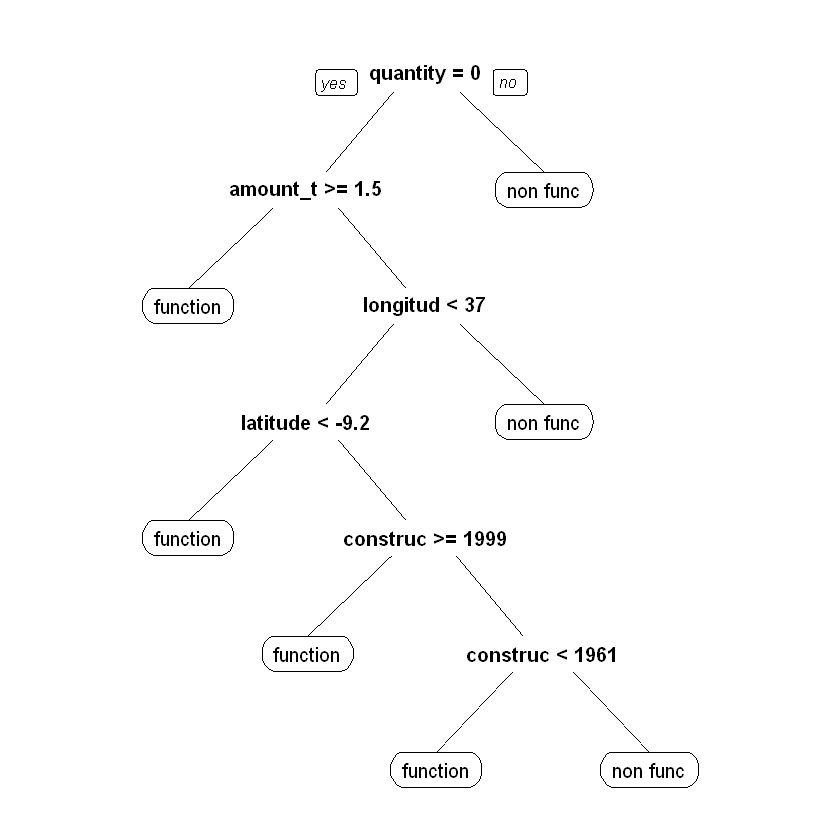

In [15]:
library(rpart)
library(rpart.plot)

preprocessing()  # Preprocessing
decision_tree_model <- rpart(status_group~., data = training_set_values, method = 'class')  # Modelling

decision_tree_prediction <- cbind(test_set_values[1], predict(decision_tree_model, test_set_values, type = 'class'))  # Predicting
names(decision_tree_prediction) <- c("id", "status_group")  # Reformatting

# Printing
prp(decision_tree_model)
head(decision_tree_prediction)
table(decision_tree_prediction["status_group"] == "functional")

# Saving
write.csv(decision_tree_prediction,"decisionTree.csv",row.names = FALSE)

## Model 2 : Neural Network

Given how popular Neural Networks are, we will also use it for the data. However we do not expect enormous result with this model since Neural Network work better for other type of problems

In [16]:
library(nnet)

preprocessing()  # Preprocessing
nnet_model <- nnet(status_group~., data = training_set_values, size = 8, decay=5e-4, maxit=200)  # Modelling

nnet_prediction <- cbind(test_set_values[1], predict(nnet_model, test_set_values, type= 'class'))  # Predicting
names(nnet_prediction) <- c("id", "status_group")  # Reformatting

# Printing
head(nnet_prediction)
table(nnet_prediction["status_group"] == "functional")

# Saving
write.csv(nnet_prediction,"predictions/NeuralNetwork.csv",row.names = FALSE)

Warning message:
"package 'nnet' was built under R version 3.6.3"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"

# weights:  227
initial  value 68567.072557 
iter  10 value 52895.023055
iter  20 value 52695.160513
iter  30 value 52599.940162
iter  40 value 52490.023150
iter  50 value 52449.270131
iter  60 value 52446.489677
iter  70 value 52431.885061
iter  80 value 52404.502405
iter  90 value 52385.411432
iter 100 value 52312.373473
iter 110 value 52213.983416
iter 120 value 52036.369153
iter 130 value 51972.943977
iter 140 value 51900.007760
iter 150 value 51888.082572
iter 160 value 51848.220392
iter 170 value 51803.313892
iter 180 value 51688.472721
iter 190 value 51675.468883
iter 200 value 51670.488131
final  value 51670.488131 
stopped after 200 iterations


,id,status_group
59401,50785,functional
59402,51630,functional
59403,17168,functional
59404,45559,functional
59405,49871,functional
59406,52449,functional



FALSE  TRUE 
 1532 13318 

## Model 3 : Random Forest

We chose this model because it is the continuity of decision tree and we think it is a good way to achieve a correct prediction

In [17]:
library("randomForest")

preprocessing()  # Preprocessing
rf_model<- randomForest(status_group~., data = training_set_values, ntrees = 1000)  # Modelling

rf_prediction <- cbind(test_set_values[1], predict(rf_model, test_set_values, type = 'class'))  # Predicting
names(rf_prediction) <- c("id", "status_group")  # Reformatting

# Printing
head(rf_prediction)
table(rf_prediction["status_group"] == "functional")

# Saving
write.csv(rf_prediction,"predictions/randomForest.csv",row.names = FALSE)

Warning message:
"package 'randomForest' was built under R version 3.6.3"randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"

,id,status_group
59401,50785,functional
59402,51630,functional
59403,17168,functional
59404,45559,non functional
59405,49871,functional
59406,52449,functional



FALSE  TRUE 
 4100 10750 

## Model 4 : Naive Bayes

[TODO antoine]
We have also looked after the Naive Bayes model.

In [18]:
library(e1071)
#library(caTools)
library(caret)

nb_model <- naiveBayes(status_group~., data=training_set_values)

nb_prediction <- cbind(test_set_values[1], predict(nb_model, newdata = test_set_values))  # Predicting
names(nb_prediction) <- c("id", "status_group")  # Reformatting

# Printing
head(nb_prediction)
table(nb_prediction["status_group"] == "functional")

write.csv(nb_prediction,"predictions/naive_bayes.csv",row.names = FALSE)

Warning message:
"package 'e1071' was built under R version 3.6.3"Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.6.3"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Attaching package: 'ggplot2'

The following object is masked from 'package:randomForest':

    margin



,id,status_group
59401,50785,functional needs repair
59402,51630,functional needs repair
59403,17168,functional needs repair
59404,45559,non functional
59405,49871,functional needs repair
59406,52449,functional needs repair



FALSE  TRUE 
13452  1398 

# Alternative models


TODO : trouver un modèle qui n'existe pas




In [ ]:
# GRADIENT BOOSTING
library(gbm)
n <- 500


preprocessing()  # Preprocessing
gm_model <- gbm(formula = status_group~., distribution = "gaussian", data = training_set_values, n.trees = n,
            interaction.depth = 4, shrinkage = 0.01, cv.folds = 10, n.minobsinnode = 10)  # Modelling

gm_prediction <- predict(gm_model, newdata = test_set_values, type="response", n.trees = n)  # Predicting

# Reformatting
gm_prediction <- cbind(test_set_values[1], colnames(gm_prediction)[apply(gm_prediction, 1, which.max)])
names(gm_prediction) <- c("id", "status_group")


# Printing
head(gm_prediction)
table(gm_prediction["status_group"] == "functional")

# Saving
write.csv(gm_prediction,"predictions/gradient_boosting.csv",row.names = FALSE)

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"

# Conclusions

In conclusion, we found that decision tree / random forest works best between our 3 models, and we think it would be even better with more accurate data (for exemple pressure sensors, temperature sensors, etc ... ). 

Neural Network is also be a good candidate for this type of problem because it can create abstraction about data in a smarter way than Nearest Neighbor to understand that geographically close waterpumps might or might not suffer the same problem